## Homework 3
### Part 1: Imbalanced Dataset

 In this homework, you will be working with an imbalanced Dataset. The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. The aim is to detect fraudlent transactions.

### Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

# Name: Brian Sohn, UNI: bs3358

### Setup

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Feel free to import any other packages you'd like to

### **Data Preprocessing and Exploration**
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [26]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **1.1 Examining the class Imbalance**
**1.1.1 How many observations are in this dataset? How many are positive and negative?**
(Note: Positive labels are labeled as 1)

In [27]:
# Your Code here

total_obs = raw_df.shape[0]
pos_obs = raw_df[raw_df['Class']==1].shape[0]
neg_obs = raw_df[raw_df['Class']==0].shape[0]

print("Number of observations:", total_obs)
print("Number of positive cases:", pos_obs, "("+str(round(pos_obs/total_obs*100,2))+"%)")
print("Number of negative cases:", neg_obs, "("+str(round(neg_obs/total_obs*100,2))+"%)")

Number of observations: 284807
Number of positive cases: 492 (0.17%)
Number of negative cases: 284315 (99.83%)


#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. We are not sure what the time column actually means so drop the Time column. The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range.

In [28]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)

**1.2.1 Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42. Print the shape of your development and test features**

In [39]:
# Your Code Here
from sklearn.model_selection import train_test_split

X = cleaned_df.drop(columns = ['Class'])
y = cleaned_df['Class']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

print("Shape of each dataset")
print("X_dev:", X_dev.shape)
print("y_dev:", y_dev.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

print()

print("proportion of each class in y_dev")
print(y_dev.value_counts(normalize=True))

print()

print("proportion of each class in y_test")
print(y_test.value_counts(normalize=True))

Shape of each dataset
X_dev: (227845, 29)
y_dev: (227845,)
X_test: (56962, 29)
y_test: (56962,)

proportion of each class in y_dev
0    0.998271
1    0.001729
Name: Class, dtype: float64

proportion of each class in y_test
0    0.99828
1    0.00172
Name: Class, dtype: float64


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [41]:
# Your Code Here
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_dev = sc.fit_transform(X_dev)
X_test = sc.transform(X_test)

#### **1.3 Defining Model and Performance Metrics**

**1.3.1 First, let us fit a default Decision tree classifier. ( use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [43]:
# Your Code here

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
scores = cross_validate(dt, X_dev, y_dev, cv=5, scoring = ['roc_auc', 'average_precision'])

print('AUC:', scores['test_roc_auc'].mean())
print('Average Precision:', scores['test_average_precision'].mean())


AUC: 0.8359524571279693
Average Precision: 0.641744070059615


**1.3.2 Perform random oversampling on the development dataset.**


*   What many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)


In [50]:
# Your Code here
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_dev_oversample, y_dev_oversample = ros.fit_resample(X_dev, y_dev)

print("Shape of X_dev:", X_dev.shape)
print("Shape of y_dev:", y_dev.shape)
print("Shape of X_dev_oversample:", X_dev_oversample.shape)
print("Shape of y_dev_oversample:", y_dev_oversample.shape)

y_dev_oversample.value_counts()

Shape of X_dev: (227845, 29)
Shape of y_dev: (227845,)
Shape of X_dev_oversample: (454902, 29)
Shape of y_dev_oversample: (454902,)


1    227451
0    227451
Name: Class, dtype: int64

**1.3.3 Repeat 1.3.1 using the dataset you created in the above step(1.3.2 Random oversampling). (Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [47]:
# Your Code here
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
scores = cross_validate(dt, X_dev_oversample, y_dev_oversample, cv=5, scoring = ['roc_auc', 'average_precision'])

print('AUC:', scores['test_roc_auc'].mean())
print('Average Precision:', scores['test_average_precision'].mean())

AUC: 0.9991528810903473
Average Precision: 0.9985380738652964


**1.3.4 Perform Random undersampling on the development dataset**. 
- What many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?
(Note: Set random state as 42 when performing undersampling)

In [51]:
# Your Code here
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=False)

X_dev_undersample, y_dev_undersample = rus.fit_resample(X_dev, y_dev)

print("Shape of X_dev:", X_dev.shape)
print("Shape of y_dev:", y_dev.shape)
print("Shape of X_dev_undersample:", X_dev_undersample.shape)
print("Shape of y_dev_undersample:", y_dev_undersample.shape)

y_dev_undersample.value_counts()



Shape of X_dev: (227845, 29)
Shape of y_dev: (227845,)
Shape of X_dev_undersample: (788, 29)
Shape of y_dev_undersample: (788,)


1    394
0    394
Name: Class, dtype: int64

**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling). (Make sure you use the same hyperparameters as 1.3.1. i,e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [49]:
# Your Code here
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
scores = cross_validate(dt, X_dev_undersample, y_dev_undersample, cv=5, scoring = ['roc_auc', 'average_precision'])

print('AUC:', scores['test_roc_auc'].mean())
print('Average Precision:', scores['test_average_precision'].mean())


AUC: 0.9303029182535673
Average Precision: 0.9022723811037444


**1.3.6 Perform Synthetic Minority Oversampling Technique(SMOTE) on the development dataset**
- What many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset? (Note: Set random state as 42 when performing SMOTE)

In [52]:
# Your code here
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

print("Shape of X_dev:", X_dev.shape)
print("Shape of y_dev:", y_dev.shape)
print("Shape of X_dev_smote:", X_dev_smote.shape)
print("Shape of y_dev_smote:", y_dev_smote.shape)

y_dev_smote.value_counts()

Shape of X_dev: (227845, 29)
Shape of y_dev: (227845,)
Shape of X_dev_smote: (454902, 29)
Shape of y_dev_smote: (454902,)


1    227451
0    227451
Name: Class, dtype: int64

**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.6 SMOTE). (Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [53]:
# Your Code here

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
scores = cross_validate(dt, X_dev_smote, y_dev_smote, cv=5, scoring = ['roc_auc', 'average_precision'])

print('AUC:', scores['test_roc_auc'].mean())
print('Average Precision:', scores['test_average_precision'].mean())


AUC: 0.9974175030591891
Average Precision: 0.9964575330041552


**1.3.8 Make predictions on the test set using the four models that you built and report their AUC values.**

In [77]:
# Your Code here
from sklearn.metrics import roc_auc_score

dt1 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt1.fit(X_dev, y_dev)
y_pred1 = dt1.predict(X_test)
y_pred1_proba = dt1.predict_proba(X_test)[:,1]
print("No Resampling:", roc_auc_score(y_test, y_pred1_proba))

dt2 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt2.fit(X_dev_oversample, y_dev_oversample)
y_pred2 = dt2.predict(X_test)
y_pred2_proba = dt2.predict_proba(X_test)[:,1]
print("Oversampling:", roc_auc_score(y_test, y_pred2_proba))

dt3 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt3.fit(X_dev_undersample, y_dev_undersample)
y_pred3 = dt3.predict(X_test)
y_pred3_proba = dt3.predict_proba(X_test)[:,1]
print("Undersampling:", roc_auc_score(y_test, y_pred3_proba))

dt4 = DecisionTreeClassifier(max_depth=10, random_state=42)
dt4.fit(X_dev_smote, y_dev_smote)
y_pred4 = dt4.predict(X_test)
y_pred4_proba = dt4.predict_proba(X_test)[:,1]
print("SMOTE:", roc_auc_score(y_test, y_pred4_proba))

No Resampling: 0.8196316775866227
Oversampling: 0.9016732009348478
Undersampling: 0.8959979162599198
SMOTE: 0.8752678248423735


**1.3.9 Plot Confusion Matrices for all the four models on the test set. Comment your results**

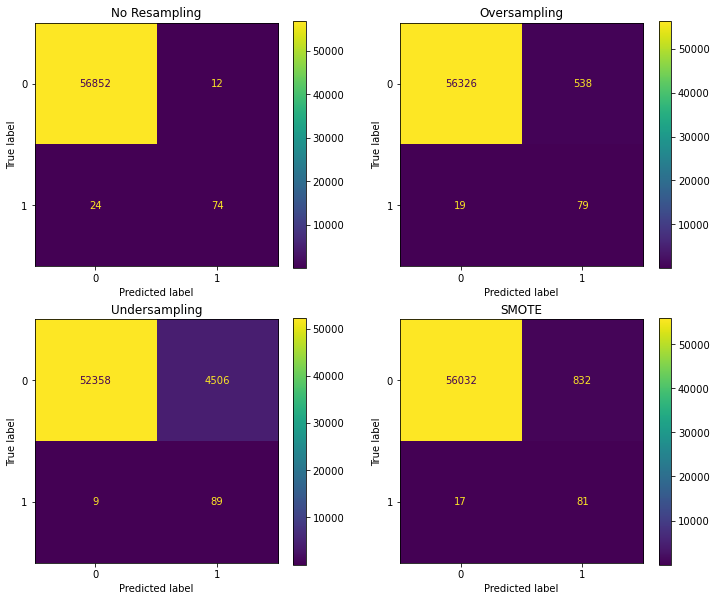

In [93]:
# Your Code here
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(2,2, figsize = (12,10))

axes[0,0].set_title("No Resampling")
cm1 = confusion_matrix(y_test, y_pred1, labels = dt1.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=dt1.classes_)
disp1.plot(ax = axes[0,0])

axes[0,1].set_title("Oversampling")
cm2 = confusion_matrix(y_test, y_pred2, labels = dt2.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=dt2.classes_)
disp2.plot(ax = axes[0,1])

axes[1,0].set_title("Undersampling")
cm3 = confusion_matrix(y_test, y_pred3, labels = dt3.classes_)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=dt3.classes_)
disp3.plot(ax = axes[1,0])

axes[1,1].set_title("SMOTE")
cm4 = confusion_matrix(y_test, y_pred4, labels = dt4.classes_)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=dt4.classes_)
disp4.plot(ax = axes[1,1])

plt.show()

# With undersampling, we see that we get more false positive predictions. 
# This is also true for oversampling and SMOTE, although the degree is much smaller. 
# On the other hand, no resampling gives us less incorrect predictions. 
# At first glance this might seem odd, since our AUC is lowest for the no resampling case. 
# However we can guess that the we are getting poor results from the other 3 confusion matrices because the default threshold of 0.5 is not the best choice. 


**1.3.10 Plot ROC for all the four models on the test set in a single plot. Make sure you label axes and legend properly. Comment your results**

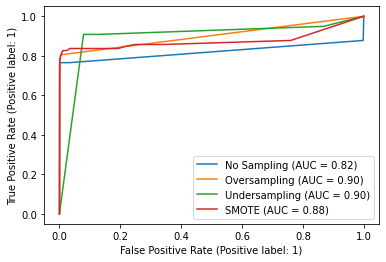

In [91]:
# Your code
from sklearn.metrics import RocCurveDisplay

ax = plt.gca()
roc_disp1 = RocCurveDisplay.from_predictions(y_test, y_pred1_proba, ax=ax, name='No Sampling')
roc_disp2 = RocCurveDisplay.from_predictions(y_test, y_pred2_proba, ax=ax, name='Oversampling')
roc_disp3 = RocCurveDisplay.from_predictions(y_test, y_pred3_proba, ax=ax, name='Undersampling')
roc_disp4 = RocCurveDisplay.from_predictions(y_test, y_pred4_proba, ax=ax, name='SMOTE')

plt.show()

**1.3.11 Train a balanced default Decision tree classifier. (use max_depth=10 and random_state=42). ( balance the class weights). Print the AUC and average precision on dev set**

In [94]:
# Your code here

dt = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
scores = cross_validate(dt, X_dev, y_dev, cv=5, scoring = ['roc_auc', 'average_precision'])

print('AUC:', scores['test_roc_auc'].mean())
print('Average Precision:', scores['test_average_precision'].mean())


AUC: 0.905514887383234
Average Precision: 0.5236357414975382


<!-- **1.3.12 Train a balanced Decision tree classifier. (You can use max_depth=10 and random_state=42)( balance the class weights). Print the AUC and average precision on test set** (Use Random state = 42) -->

**1.3.12 Plot confusion matrix on test set using the above model and comment on your results**

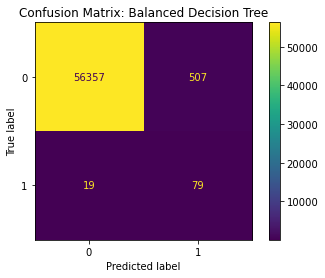

In [97]:
# Your code here
dt = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
dt.fit(X_dev, y_dev)
y_pred = dt.predict(X_test)

fig, ax = plt.subplots()
ax.set_title('Confusion Matrix: Balanced Decision Tree')
cm = confusion_matrix(y_test, y_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(ax = ax)

plt.show()

# The confusion matrix is similar to the one obtained through oversampling. 